In [1]:
# Import libraries

import pandas as pd      
import numpy as np                   
import matplotlib.pyplot as plt                    
import seaborn as sns                   


In [2]:
df = pd.read_csv("fb_mkt_new.csv")
df.head()


,Client_id,first_question,second_question,third_question,4th_question,Unnamed: 5,Unnamed: 6,gender,amount_suggested,date,time
0,1,"Hi, is this available?",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2025,NAN
1,2,I got $600 cash right now,On everything I love I would if I had that I p...,I'm trying to get back and forth to work and m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Hi, is this available?",No it’s okay tomorrow I’m ganan talk to my dad...,Maybe or I could interest you in 3 pounds of g...,NaN,NaN,NaN,NaN,NaN,12/1/2025,NaN
3,4,"Hi Gabriel, is this still available?",What's wrong with it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Hey what’s up is this car still availble if so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
questions = df.iloc[:, 0:2]

In [4]:
questions = questions.drop_duplicates(subset=["Client_id"])

In [5]:
questions.columns = questions.columns.str.lower().str.strip()
questions.head()

,client_id,first_question
0,1,"Hi, is this available?"
1,2,I got $600 cash right now
2,3,"Hi, is this available?"
3,4,"Hi Gabriel, is this still available?"
4,5,Hey what’s up is this car still availble if so...


In [6]:
[word for word in questions["first_question"]]

['Hi, is this available?',
 'I got $600 cash right now',
 'Hi, is this available?',
 'Hi Gabriel, is this still available?',
 'Hey what’s up is this car still availble if so can u hmu asap',
 'Hello, is this still available?',
 'Hi Gabriel, is this still available?',
 'Hi, is this available?',
 'Hi Gabriel, is this still available?',
 'Hi I’m interested in the car and was wondering if there are any mechanical issues?',
 'Hi Gabriel, is this still available?',
 'Hello, is this still available?',
 'Is this still available?',
 '500 cash',
 'Hi, is this available?',
 'Hi, is this available? 700',
 'Is this still available?',
 'Is this still available?',
 'Good morning, is this still available?',
 'what are the damages or concerns?',
 'Hi, is this available?',
 'Hi, is this available?',
 'Hello, is this still available?',
 'Hello, is this still available?',
 'Hi, is this available?',
 '500 cash',
 'What engine',
 'Is this still available?',
 'Hello, is this still available?',
 'Hi Gabriel, 

In [7]:
questions["first_question"] = questions["first_question"].astype(str)

In [8]:
[word.lower() for word in questions["first_question"]]

['hi, is this available?',
 'i got $600 cash right now',
 'hi, is this available?',
 'hi gabriel, is this still available?',
 'hey what’s up is this car still availble if so can u hmu asap',
 'hello, is this still available?',
 'hi gabriel, is this still available?',
 'hi, is this available?',
 'hi gabriel, is this still available?',
 'hi i’m interested in the car and was wondering if there are any mechanical issues?',
 'hi gabriel, is this still available?',
 'hello, is this still available?',
 'is this still available?',
 '500 cash',
 'hi, is this available?',
 'hi, is this available? 700',
 'is this still available?',
 'is this still available?',
 'good morning, is this still available?',
 'what are the damages or concerns?',
 'hi, is this available?',
 'hi, is this available?',
 'hello, is this still available?',
 'hello, is this still available?',
 'hi, is this available?',
 '500 cash',
 'what engine',
 'is this still available?',
 'hello, is this still available?',
 'hi gabriel, 

In [9]:
questions["lower"] = [word.lower() for word in questions["first_question"]]

In [10]:
questions["length"] = [len(word) for word in questions["first_question"]]

In [11]:
questions.head()

,client_id,first_question,lower,length
0,1,"Hi, is this available?","hi, is this available?",22
1,2,I got $600 cash right now,i got $600 cash right now,25
2,3,"Hi, is this available?","hi, is this available?",22
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61


In [12]:
common_word = "available"
questions["present"] = questions["lower"].str.contains(common_word, na=False)

In [13]:
questions

,client_id,first_question,lower,length,present
0,1,"Hi, is this available?","hi, is this available?",22,True
1,2,I got $600 cash right now,i got $600 cash right now,25,False
2,3,"Hi, is this available?","hi, is this available?",22,True
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False
5,6,"Hello, is this still available?","hello, is this still available?",31,True
6,7,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True
7,8,"Hi, is this available?","hi, is this available?",22,True
8,9,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True
9,10,Hi I’m interested in the car and was wondering...,hi i’m interested in the car and was wondering...,82,False


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

questions["reps"] = encoder.fit_transform(questions["present"])
questions.head()

,client_id,first_question,lower,length,present,reps
0,1,"Hi, is this available?","hi, is this available?",22,True,1
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0
2,3,"Hi, is this available?","hi, is this available?",22,True,1
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0


In [15]:
questions["reps"].sum()

np.int64(34)

In [16]:
questions.head()

,client_id,first_question,lower,length,present,reps
0,1,"Hi, is this available?","hi, is this available?",22,True,1
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0
2,3,"Hi, is this available?","hi, is this available?",22,True,1
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0


In [17]:
import re

s = questions["lower"][1]

int(re.search(r"\d+", s).group())

600

In [18]:
questions["price"] = (
    questions["lower"]
    .str.extract(r"(\d+)")
    .astype("float")   
)

In [19]:
questions.head()

,client_id,first_question,lower,length,present,reps,price
0,1,"Hi, is this available?","hi, is this available?",22,True,1,NaN
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0,600.0
2,3,"Hi, is this available?","hi, is this available?",22,True,1,NaN
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1,NaN
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0,NaN


In [20]:
import numpy

questions["price"] = questions["price"].replace(" ", np.nan)
questions["price"] = questions["price"].fillna(0)

In [21]:
questions.head()

,client_id,first_question,lower,length,present,reps,price
0,1,"Hi, is this available?","hi, is this available?",22,True,1,0.0
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0,600.0
2,3,"Hi, is this available?","hi, is this available?",22,True,1,0.0
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1,0.0
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0,0.0


In [22]:
import transformers
from transformers import pipeline
import tensorflow



c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [23]:
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

sentiment_analyzer("I really enjoyed this movie!")

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998719692230225}]

In [24]:
word_rez = sentiment_analyzer(questions["lower"][0])

print(word_rez[0]["score"])
print(word_rez[0]["label"])

0.9917634725570679
POSITIVE


In [25]:
questions["score"] = questions["lower"].apply(
    lambda row: sentiment_analyzer(row)[0]["score"]   
                                            )

In [26]:
questions["label"] = questions["lower"].apply(
    lambda row: sentiment_analyzer(row)[0]["label"]   
                                            )

In [27]:
questions.head()

,client_id,first_question,lower,length,present,reps,price,score,label
0,1,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0,600.0,0.885751,NEGATIVE
2,3,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1,0.0,0.985768,POSITIVE
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0,0.0,0.973016,NEGATIVE


<Axes: >

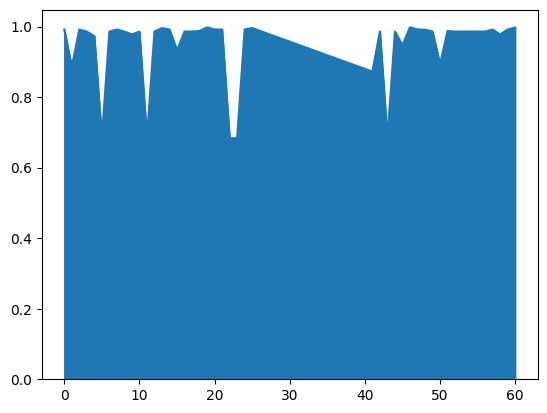

In [28]:
questions["score"].plot(kind="area")

In [29]:

ner = pipeline(
    "token-classification",
    model="dslim/bert-base-NER",
    aggregation_strategy="simple"
)

text = "John Grisham lives in Virginia and works with Doubleday."

ner(text)


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity_group': 'PER',
  'score': np.float32(0.9993634),
  'word': 'John Grisham',
  'start': 0,
  'end': 12},
 {'entity_group': 'LOC',
  'score': np.float32(0.99969923),
  'word': 'Virginia',
  'start': 22,
  'end': 30},
 {'entity_group': 'ORG',
  'score': np.float32(0.8787576),
  'word': 'Doubleday',
  'start': 46,
  'end': 55}]

In [30]:
stext = questions["lower"][4]
print(stext)

ner(stext)

hey what’s up is this car still availble if so can u hmu asap


[]

In [31]:
questions.head()

,client_id,first_question,lower,length,present,reps,price,score,label
0,1,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0,600.0,0.885751,NEGATIVE
2,3,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1,0.0,0.985768,POSITIVE
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0,0.0,0.973016,NEGATIVE


In [32]:
questions["sentiment_label"] = encoder.fit_transform(questions["label"])

In [33]:
questions["isbuyer"] = ["buyer" if x >= 900 else "not_buyer" for x in questions["price"]]


In [34]:
questions.head()

,client_id,first_question,lower,length,present,reps,price,score,label,sentiment_label,isbuyer
0,1,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE,1,not_buyer
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0,600.0,0.885751,NEGATIVE,0,not_buyer
2,3,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE,1,not_buyer
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1,0.0,0.985768,POSITIVE,1,not_buyer
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0,0.0,0.973016,NEGATIVE,0,not_buyer


In [35]:
questions["isbuyer_num"] = encoder.fit_transform(questions["isbuyer"])

In [36]:
questions.head()

,client_id,first_question,lower,length,present,reps,price,score,label,sentiment_label,isbuyer,isbuyer_num
0,1,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE,1,not_buyer,1
1,2,I got $600 cash right now,i got $600 cash right now,25,False,0,600.0,0.885751,NEGATIVE,0,not_buyer,1
2,3,"Hi, is this available?","hi, is this available?",22,True,1,0.0,0.991763,POSITIVE,1,not_buyer,1
3,4,"Hi Gabriel, is this still available?","hi gabriel, is this still available?",36,True,1,0.0,0.985768,POSITIVE,1,not_buyer,1
4,5,Hey what’s up is this car still availble if so...,hey what’s up is this car still availble if so...,61,False,0,0.0,0.973016,NEGATIVE,0,not_buyer,1


In [97]:
buyer = questions[questions["isbuyer"] == "buyer"]
buyer

,client_id,first_question,lower,length,present,reps,price,score,label,sentiment_label,isbuyer,isbuyer_num
60,46,I have $900 cash would you take that? If so I ...,i have $900 cash would you take that? if so i ...,81,False,0,900.0,0.997208,NEGATIVE,0,buyer,0


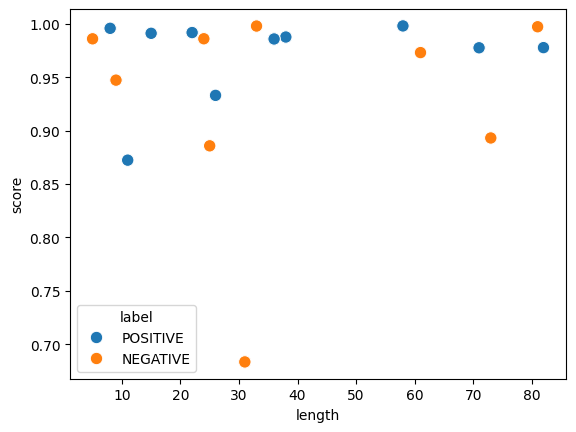

In [98]:
sns.scatterplot(data=questions, x="length", 
                y="score",
                s=80,
                hue="label")
plt.show()

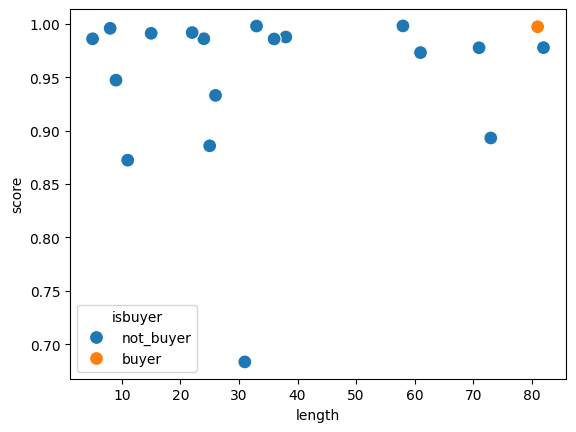

In [95]:
sns.scatterplot(data=questions, x="length", 
                y="score",
                s=100,
                hue="isbuyer")
plt.show()

In [38]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 60
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        46 non-null     int64  
 1   first_question   46 non-null     object 
 2   lower            46 non-null     object 
 3   length           46 non-null     int64  
 4   present          46 non-null     bool   
 5   reps             46 non-null     int64  
 6   price            46 non-null     float64
 7   score            46 non-null     float64
 8   label            46 non-null     object 
 9   sentiment_label  46 non-null     int64  
 10  isbuyer          46 non-null     object 
 11  isbuyer_num      46 non-null     int64  
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 5.4+ KB


In [39]:
questions_num = questions.select_dtypes(include=["int64","float64"]).iloc[:,1:]

In [40]:
questions_num

,length,reps,price,score,sentiment_label,isbuyer_num
0,22,1,0.0,0.991763,1,1
1,25,0,600.0,0.885751,0,1
2,22,1,0.0,0.991763,1,1
3,36,1,0.0,0.985768,1,1
4,61,0,0.0,0.973016,0,1
5,31,1,0.0,0.683479,0,1
6,36,1,0.0,0.985768,1,1
7,22,1,0.0,0.991763,1,1
8,36,1,0.0,0.985768,1,1
9,82,0,0.0,0.977662,1,1


In [41]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ncomp = 2
pipe = Pipeline([("scaler", StandardScaler()),
                 ("pca", PCA(n_components=ncomp))]
                )

df_pca = pipe.fit_transform(questions_num)


In [42]:
data = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
data.head()

,PC1,PC2
0,0.982576,0.781321
1,-1.707243,-0.821814
2,0.982576,0.781321
3,0.679695,0.740167
4,-1.297394,-0.266421


In [43]:
dataPCA = pd.concat([data,questions["isbuyer"]], axis=1)

dataPCA

,PC1,PC2,isbuyer
0,0.982576,0.781321,not_buyer
1,-1.707243,-0.821814,not_buyer
2,0.982576,0.781321,not_buyer
3,0.679695,0.740167,not_buyer
4,-1.297394,-0.266421,not_buyer
...,...,...,...
56,NaN,NaN,not_buyer
57,NaN,NaN,not_buyer
58,NaN,NaN,not_buyer
59,NaN,NaN,not_buyer


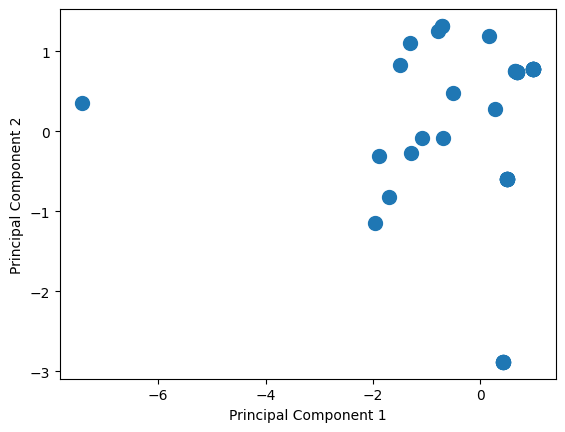

In [44]:
plt.scatter(x=data["PC1"], y=data["PC2"],
            s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

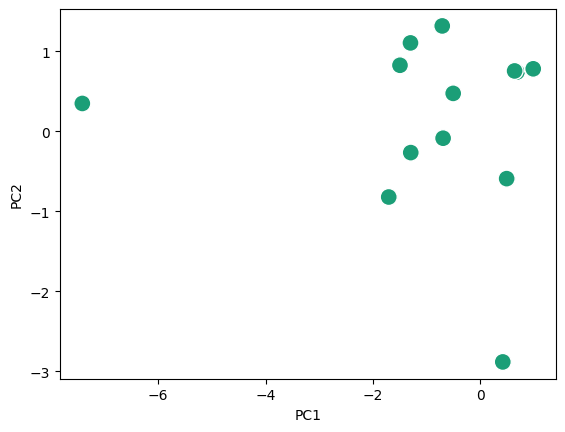

In [45]:
sns.scatterplot(data=dataPCA, x="PC1",
                              y="PC2",
                              hue="isbuyer",
                              palette="Dark2",
                              s=150,
                              alpha=1,
                              legend=False)
plt.show()

In [46]:
questions["lower"]

0                                hi, is this available?
1                             i got $600 cash right now
2                                hi, is this available?
3                  hi gabriel, is this still available?
4     hey what’s up is this car still availble if so...
5                       hello, is this still available?
6                  hi gabriel, is this still available?
7                                hi, is this available?
8                  hi gabriel, is this still available?
9     hi i’m interested in the car and was wondering...
10                 hi gabriel, is this still available?
11                      hello, is this still available?
12                             is this still available?
13                                             500 cash
14                               hi, is this available?
15                           hi, is this available? 700
16                             is this still available?
17                             is this still ava

In [64]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import spacy_cleaner

In [62]:
model = spacy.load("en_core_web_sm")

In [72]:
def clean_tokens(text):
    doc = model(text.lower())
    return [
        token.text
        for token in doc
        if not token.is_stop      # remove stop words
        and not token.is_punct   # remove punctuation
        and not token.like_num   # remove numbers
    ]

tokens =questions["lower"].apply(clean_tokens)


In [73]:
words = tokens.explode()
freq = words.value_counts()


In [101]:
print(words)

0            hi
0     available
1           got
1             $
1          cash
        ...    
60            $
60         cash
60         come
60        thing
60      morning
Name: lower, Length: 109, dtype: object


In [99]:
print(freq)

lower
available     34
hi            18
gabriel        6
hello          6
cash           5
$              4
morning        4
good           3
asap           3
interested     2
u              2
hey            2
car            2
right          1
got            1
hmu            1
availble       1
mechanical     1
wondering      1
issues         1
damages        1
concerns       1
engine         1
want           1
reply          1
hold           1
able           1
like           1
offer          1
come           1
thing          1
Name: count, dtype: int64


In [ ]:
top5_wrods = freq[:5]
print(top5_wrods)

In [103]:
top5 = top5_wrods.to_dict()

print(top5)

{'available': 34, 'hi': 18, 'gabriel': 6, 'hello': 6, 'cash': 5}


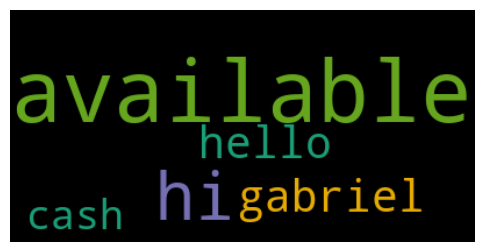

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    background_color="black",
    colormap="Dark2",
    max_font_size=120
)

wc.generate_from_frequencies(top5)
plt.figure(figsize=(6,4))
plt.imshow(wc, interpolation="bilinear")
# plt.title("Top 5 - Word Frequencies")
plt.axis("off")
plt.show()


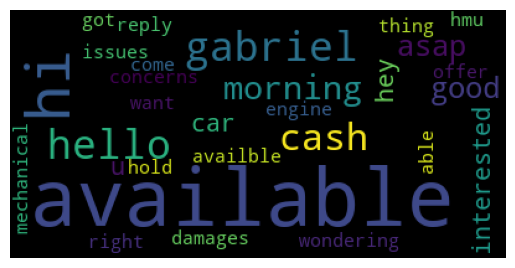

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="black").generate(" ".join(words))

plt.imshow(wc)
plt.axis("off")
plt.show()


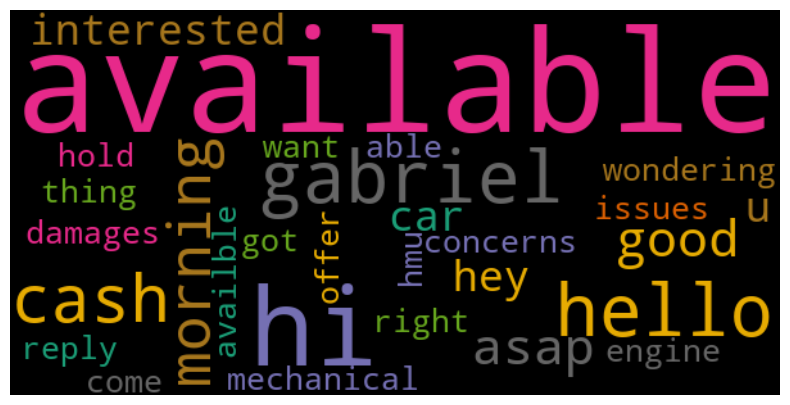

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=600,
    height=300,
    background_color="black",
    colormap="Dark2",   # darker colors
    max_font_size=120
)

wc.generate(" ".join(words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [129]:
top5_wrods.reset_index()

,lower,count
0,available,34
1,hi,18
2,gabriel,6
3,hello,6
4,cash,5


In [136]:
top_df = pd.DataFrame(top5_wrods)
top_df.columns

Index(['count'], dtype='object')